In [8]:
# Python DeCal
# HW 8: Curve Fitting and Linear Regression
# Question 1 - Curve Fitting Guided Problem

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from scipy.optimize import curve_fit

#1a
# loads in the dataset (saved as 'data')
# using json rather than csv since my computer couldn't process csv
data = pd.read_csv('GlobalLandTemperaturesByState.csv')

# filters columns
data = data[['dt', 'AverageTemperature', 'State']]

# filters years after 2000
data['dt'] = pd.to_datetime(data['dt'])
data = data[data['dt'].dt.year > 2000]

# filters states
filtered_states = ['Wyoming', 'Nebraska', 'South Dakota']
data = data[data['State'].isin(filtered_states)]

In [5]:
data

,dt,AverageTemperature,State
350773,2001-01-01,-2.592,Nebraska
350774,2001-02-01,-5.575,Nebraska
350775,2001-03-01,2.077,Nebraska
350776,2001-04-01,10.431,Nebraska
350777,2001-05-01,15.878,Nebraska
...,...,...,...
626435,2013-05-01,10.607,Wyoming
626436,2013-06-01,16.267,Wyoming
626437,2013-07-01,20.222,Wyoming
626438,2013-08-01,19.621,Wyoming


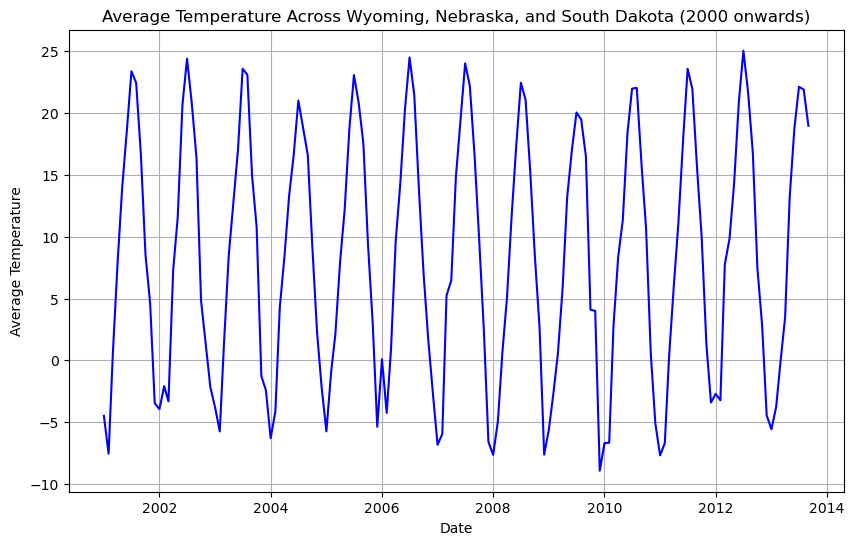

In [9]:
#1b
average_temps = data.groupby('dt')['AverageTemperature'].mean().reset_index()

#1c
plt.figure(figsize=(10, 6))
plt.plot(average_temps['dt'], average_temps['AverageTemperature'], color='blue')

plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Average Temperature Across Wyoming, Nebraska, and South Dakota (2000 onwards)')

plt.grid(True)
plt.show()

In [16]:
#1d
def convert_to_numerical(date):
    return date.toordinal()

# Apply the function to each datetime object in the 'dt' column
data['NumericalDate'] = data['dt'].apply(convert_to_numerical)

In [19]:
#1e
# Model Equation: y = a*sin(b*x+c)+d
# guess at parameters: a = max temp - min temp, b = 2pi/period, c = 0, d = mean temp

def sinusoidal(x, a, b, c, d):
    return a * np.sin(b * x + c) + d

min_temp = data['AverageTemperature'].min()
max_temp = data['AverageTemperature'].max()
mean_temp = data['AverageTemperature'].mean()
period_guess = 2 
frequency_guess = 2 * np.pi / period_guess

initial_guess = [max_temp - min_temp, frequency_guess, 0, mean_temp]


#1f 
params, covariance = curve_fit(sinusoidal, data['dt'], data['AverageTemperature'], p0=initial_guess)

#1g
plt.figure(figsize=(10, 6))
plt.scatter(data['dt'], data['AverageTemperature'], color='blue', label='Data')
plt.plot(data['dt'], sinusoidal(data['dt'], *params), color='red', label='Fitted curve')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Fitted Sinusoidal Model to Average Temperature Data')
plt.legend()
plt.grid(True)
plt.show()

TypeError: cannot perform __rmul__ with this index type: DatetimeArray